# Data S4 FAFB connectomics Investigation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Exploration of FAFB neurons used

In [2]:
s4_df = pd.read_csv("../data/DataS4_FAFBreconstruction.csv")
s4_df.head()

/var/folders/h5/y2nr173s6q74pvx6t500dlbw0000gn/T/ipykernel_66048/52917614.py:1: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  s4_df = pd.read_csv("../data/DataS4_FAFBreconstruction.csv")


,root_630,root_783,pos_x,pos_y,pos_z,nucleus_id,side,ito_lee_hemilineage,hartenstein_hemilineage,morphology_group,...,acetylcholine,gaba,glutamate,dopamine,serotonin,octopamine,segregation_index,projection_score,in_ground_truth,notes
0,720575940603453286,720575940603453286,138500.0,56630.0,2156,5056135.0,right,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.1,0.0,0.0,0.425,0.425,False,NaN
1,720575940625413395,720575940625413395,113000.0,59340.0,1655,4491112.0,left,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.1,0.0,0.0,0.543,0.543,True,NaN
2,720575940624789125,720575940624789125,140300.0,58960.0,1734,5056625.0,right,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.1,0.1,0.1,0.0,0.308,0.308,False,NaN
3,720575940629743415,720575940630003472,139800.0,59110.0,1788,5057631.0,right,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.0,0.1,0.0,0.297,0.297,False,NaN
4,720575940629587671,720575940629587671,171200.0,33940.0,3250,5056503.0,right,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.1,0.1,0.0,0.0,0.258,0.258,False,NaN


In [4]:
all_columns = s4_df.columns.tolist()
print("All columns in the DataFrame:")
for col in all_columns:
    print(f"    {col}")

All columns in the DataFrame:
    root_630
    root_783
    pos_x
    pos_y
    pos_z
    nucleus_id
    side
    ito_lee_hemilineage
    hartenstein_hemilineage
    morphology_group
    cell_class
    cell_sub_class
    cell_type
    hemibrain_type
    pre
    conf_nt
    conf_nt_p
    top_nt
    top_nt_p
    known_nt
    known_nt_source
    acetylcholine
    gaba
    glutamate
    dopamine
    serotonin
    octopamine
    segregation_index
    projection_score
    in_ground_truth
    notes


Ok so here's the quick breakdown of the columns and their meanings
| Column Name                                                                 | Description                                                                                                               |
| --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| `root_630`                                                                  | **Neuron ID** in FlyWire version 630. Use this to view the neuron at [https://flywire.ai](https://flywire.ai).            |
| `root_783`                                                                  | Neuron ID in FlyWire version 783. Used internally for improved morphology and synapse annotation. Not publicly browsable. |
| `pos_x`, `pos_y`, `pos_z`                                                   | Approximate soma coordinates (in nm) for the neuron within the EM volume.                                                 |
| `nucleus_id`                                                                | ID of the nucleus associated with the neuron (may be `NaN` if unknown).                                                   |
| `side`                                                                      | Hemisphere the neuron resides in: `left` or `right`.                                                                      |
| `ito_lee_hemilineage`                                                       | Hemilineage name based on the Ito & Lee lineage naming convention.                                                        |
| `hartenstein_hemilineage`                                                   | Hemilineage name based on the Hartenstein lineage schema.                                                                 |
| `morphology_group`                                                          | Cluster of neurons with similar morphology, often indicating a cell type.                                                 |
| `cell_class`                                                                | Broad functional group (e.g. `sensory`, `interneuron`, `projection neuron`).                                              |
| `cell_sub_class`                                                            | Subdivision of cell class, if applicable.                                                                                 |
| `cell_type`                                                                 | Named or inferred cell type label (if available).                                                                         |
| `hemibrain_type`                                                            | Matching cell type from the Hemibrain dataset, if available.                                                              |
| `pre`                                                                       | Total number of **presynaptic sites** assigned to this neuron.                                                            |
| `conf_nt`                                                                   | Predicted neurotransmitter with **highest confidence**.                                                                   |
| `conf_nt_p`                                                                 | Proportion of presynaptic sites supporting `conf_nt`. (Confidence value, 0–1).                                            |
| `top_nt`                                                                    | Predicted transmitter based on **top probability**, even if not majority.                                                 |
| `top_nt_p`                                                                  | Probability of `top_nt` according to classifier.                                                                          |
| `known_nt`                                                                  | Literature-based known transmitter, if available.                                                                         |
| `known_nt_source`                                                           | Citation or source for `known_nt`.                                                                                        |
| `acetylcholine`, `gaba`, `glutamate`, `dopamine`, `serotonin`, `octopamine` | Per-class classifier confidence scores for each neurotransmitter (range: 0–1).                                            |
| `segregation_index`                                                         | Measure of how spatially segregated the axon and dendrite compartments are. Higher values imply clearer separation.       |
| `projection_score`                                                          | A score based on axon projection length and morphology—indicative of long-range projection neurons.                       |
| `in_ground_truth`                                                           | `True` if this neuron was used as part of the supervised ground-truth training set.                                       |
| `notes`                                                                     | Free-form field for manual annotations, often empty.                                                                      |

So the key columns I will use are:
* `root_630`: As the NeuronId
* `pos_x`, `pos_y`, and `pos_z`: For the approximate location of the neuron
* `cell_class`
* `cell_type`
* `pre`: The number of pre-synaptic sites.
* `conf_nt`: The models prediction for the neuron.
* `known_nt`: The known neurotransmitter types.
* `acetylcholine`, `gaba`, `glutamate`, `dopamine`, `serotonin`, `octopamine`: The ratio of synapses expressing the neurotransmitter in the neuron.
* `in_ground_truth`: Whether this is in the ground truth dataset or not.


In [9]:
known_nts = s4_df['known_nt'].value_counts()
display(known_nts)

known_nt
acetylcholine                           31646
glutamate                                6857
gaba, nitric oxide                       3127
acetylcholine, allatostatin-c            2975
acetylcholine, sNPF, sparkly             2490
                                        ...  
dopamine, sparkly, Nplp1                    2
serotonin, natalisin                        2
gaba, acetylcholine                         1
allatostatin-a, allatostatin-c, Dh44        1
glycine, pdf                                1
Name: count, Length: 72, dtype: int64

Ok so there are 72 different mixes here which we will need to trawl through. But first let's only investigate those part of the ground truth 

In [11]:
df = s4_df[s4_df['in_ground_truth']]
df

,root_630,root_783,pos_x,pos_y,pos_z,nucleus_id,side,ito_lee_hemilineage,hartenstein_hemilineage,morphology_group,...,acetylcholine,gaba,glutamate,dopamine,serotonin,octopamine,segregation_index,projection_score,in_ground_truth,notes
1,720575940625413395,720575940625413395,113000.0,59340.0,1655,4491112.0,left,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.1,0.0,0.0,0.543,0.543,True,NaN
6,720575940614316731,720575940614316731,122700.0,56360.0,2263,3664792.0,left,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.1,0.0,0.0,0.220,0.220,True,NaN
7,720575940627949929,720575940627949929,123400.0,57510.0,2088,NaN,left,ALad1,BAmv3,ALad1__1,...,0.9,0.0,0.0,0.1,0.0,0.0,0.302,0.302,True,NaN
9,720575940620551259,720575940620551259,125100.0,58910.0,2231,4411821.0,left,ALad1,BAmv3,ALad1__1,...,0.8,0.0,0.0,0.1,0.1,0.0,0.299,0.299,True,NaN
12,720575940631930828,720575940631930828,114600.0,63600.0,1617,3733893.0,left,ALad1,BAmv3,NaN,...,0.9,0.0,0.0,0.0,0.0,0.0,0.362,0.362,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132414,720575940636258623,720575940636258623,81610.0,62080.0,2581,1534545.0,left,NaN,NaN,NaN,...,0.4,0.1,0.4,0.0,0.0,0.1,0.109,0.109,True,NaN
132415,720575940632391264,720575940632391264,78740.0,54060.0,2845,1508725.0,left,NaN,NaN,NaN,...,0.4,0.1,0.5,0.1,0.0,0.0,0.119,0.119,True,NaN
132424,720575940611642773,720575940611642773,80550.0,64740.0,2638,1533907.0,left,NaN,NaN,NaN,...,0.4,0.1,0.4,0.0,0.0,0.0,0.110,0.110,True,NaN
132425,720575940611437846,720575940611437846,82060.0,63080.0,2739,1534734.0,left,NaN,NaN,NaN,...,0.4,0.1,0.4,0.0,0.0,0.1,0.125,0.125,True,NaN


Ok just down to 670 rows which is much easier to investigate. Let's find out what NT types are available.

In [12]:
df['known_nt'].value_counts()

known_nt
acetylcholine                                                                       421
gaba                                                                                115
glutamate                                                                            24
dopamine, nitric oxide                                                               23
dopamine                                                                             17
acetylcholine, space blanket                                                          9
gaba, nitric oxide                                                                    9
glutamate, proctolin, ecdysis- triggering hormone, bursicon                           6
glutamate, gaba                                                                       6
acetylcholine, amnesiac, allatostatin-c, Dh44                                         5
acetylcholine, sparkly                                                                5
dopamine, amnesiac, spa

Interesting there are some random ones here. e.g. sparkly, and space blanket. Let's split this up to each class.

In [21]:
classes = df['known_nt'].unique()
nts_present = []

for cls in classes:
    #split by commas
    cls = str(cls)
    nts = cls.split(',')
    for nt in nts:
        #strip whitespace at the start and end
        nt = nt.strip()
        if (nt not in nts_present) and (nt not in ['nan', 'space blanket', 'sparkly']):
            nts_present.append(nt)
print(f"NTs present in the ground truth: {len(nts_present)}")
print(nts_present)  
    

NTs present in the ground truth: 22
['acetylcholine', 'gaba', 'dopamine', 'nitric oxide', 'Nplp1', 'sNPF', 'amnesiac', 'CG34136', 'CG43117', 'ion-transport peptide', 'Dh44', 'allatostatin-c', 'glutamate', 'CCHa1', 'bursicon', 'proctolin', 'ecdysis- triggering hormone', 'Dh31', 'Ms', 'tachykinin', 'serotonin', 'natalisin']


## Make a clean dataframe for each neuron

In [34]:
final_df = df[['root_630','pre','pos_x','pos_y','pos_z','cell_class','cell_type','known_nt']]

# now start with one hot encoding the known_nt column
final_df.loc[:,nts_present] = False

for index, row in final_df.iterrows():
    nts = str(row['known_nt']).split(',')
    for nt in nts:
        nt = nt.strip()
        if nt in nts_present:
            final_df.at[index, nt] = True

final_df['num_nts'] = final_df[nts_present].sum(axis=1)
final_df['is_cotransmitter'] = final_df['num_nts'] > 1
final_df
#temp = ['acetylcholine_present','gaba_present','dopamine_present','nitric_oxide_present','Nplp1_present','sNPF_present','amnesiac', 'CG34136', 'CG43117', 'ion-transport peptide', 'Dh44', 'allatostatin-c', 'glutamate', 'CCHa1', 'bursicon', 'proctolin', 'ecdysis- triggering hormone', 'Dh31', 'Ms', 'tachykinin', 'serotonin', 'natalisin']
                                 

,root_630,pre,pos_x,pos_y,pos_z,cell_class,cell_type,known_nt,acetylcholine,gaba,...,bursicon,proctolin,ecdysis- triggering hormone,Dh31,Ms,tachykinin,serotonin,natalisin,num_nts,is_cotransmitter
1,720575940625413395,1201.0,113000.0,59340.0,1655,ALPN,"(M_adPNm4,M_adPNm5)a",acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
6,720575940614316731,1171.0,122700.0,56360.0,2263,ALPN,"(M_adPNm4,M_adPNm5)b",acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
7,720575940627949929,1163.0,123400.0,57510.0,2088,ALPN,"(M_adPNm4,M_adPNm5)b",acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
9,720575940620551259,2092.0,125100.0,58910.0,2231,ALPN,"(M_adPNm4,M_adPNm5)c",acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
12,720575940631930828,17834.0,114600.0,63600.0,1617,ALPN,DA4m_adPN,acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132414,720575940636258623,2395.0,81610.0,62080.0,2581,ME,Mi1,acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
132415,720575940632391264,1749.0,78740.0,54060.0,2845,ME,Mi1,acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
132424,720575940611642773,1881.0,80550.0,64740.0,2638,ME,Mi1,acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False
132425,720575940611437846,1798.0,82060.0,63080.0,2739,ME,Mi1,acetylcholine,True,False,...,False,False,False,False,False,False,False,False,1,False


# Visualisations

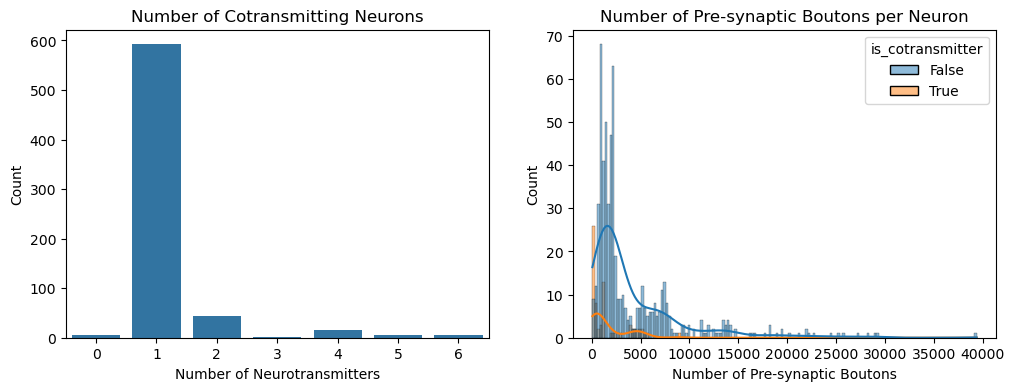

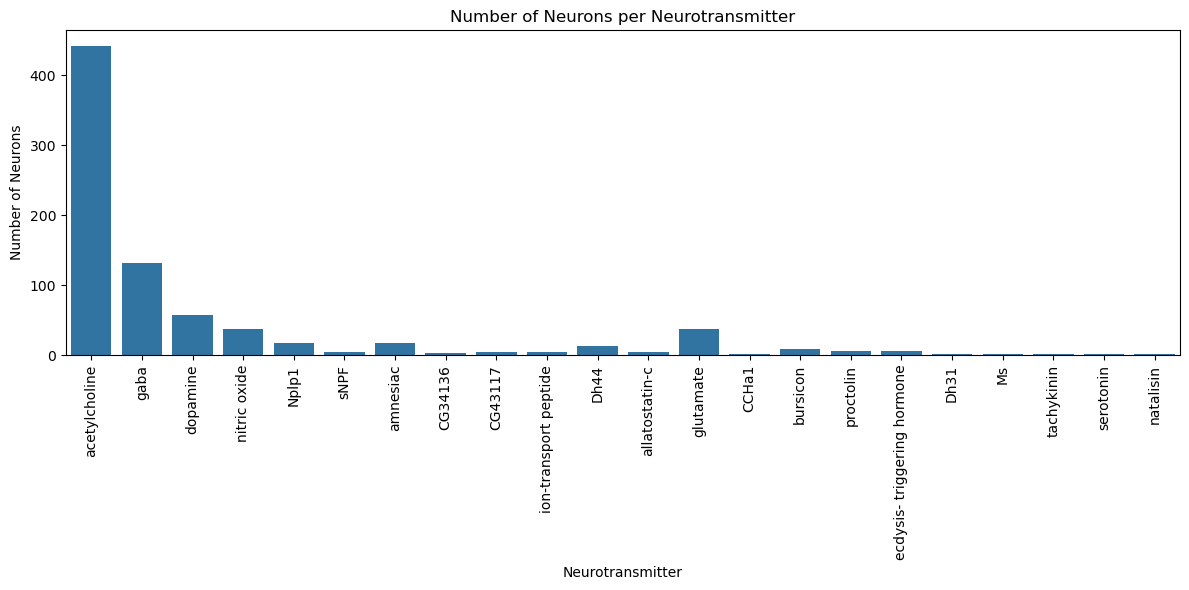

In [65]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

# Plot the number of cotransmitting neurons
sns.countplot(data=final_df, x='num_nts', ax=ax[0])
ax[0].set_title('Number of Cotransmitting Neurons')
ax[0].set_xlabel('Number of Neurotransmitters')
ax[0].set_ylabel('Count')

# Plot the number of pre-synaptic boutons per neuron
sns.histplot(data=final_df, x='pre', hue='is_cotransmitter', binwidth=250, kde=True, ax=ax[1])
ax[1].set_title('Number of Pre-synaptic Boutons per Neuron')
ax[1].set_xlabel('Number of Pre-synaptic Boutons')
ax[1].set_ylabel('Count')

# Plot the ratios for each neurotransmitter type
temp = {}
for nt in nts_present:
    temp[nt] = final_df[nt].value_counts().to_dict()
temp_df = pd.DataFrame(temp).T

plt.figure(figsize=(12,6))
sns.barplot(x=temp_df.index, y=temp_df[True])
plt.xticks(rotation=90)
plt.xlabel('Neurotransmitter')
plt.ylabel('Number of Neurons')
plt.title('Number of Neurons per Neurotransmitter')
plt.tight_layout()
plt.show()

# sns.barplot(data=pd.DataFrame(temp), ax=ax[1,0])
# ax[1,0].set_title('Neurotransmitter Ratios')
# ax[1,0].set_xlabel('Neurotransmitter')
# ax[1,0].set_ylabel('Count')

So there are lots of what could be better described as neuropeptides here given that the CNN doesn't look for them and only 
* acetylcholine
* gaba
* glutamate
* dopamine
* serotonin
* octopamine

Therefore let's filter to only include these in co-transmission.

In [70]:
simplified_final_df = final_df[['root_630', 'pre', 'pos_x', 'pos_y', 'pos_z', 'cell_class', 'cell_type', 'known_nt', 'acetylcholine', 'gaba', 'glutamate', 'dopamine', 'serotonin']]
simplified_final_df.loc[:,'octopamine'] = False
simplified_final_df['num_nts'] = simplified_final_df[['acetylcholine', 'gaba', 'glutamate', 'dopamine', 'serotonin', 'octopamine']].sum(axis=1)
simplified_final_df['is_cotransmitter'] = simplified_final_df['num_nts'] > 1
simplified_final_df


/var/folders/h5/y2nr173s6q74pvx6t500dlbw0000gn/T/ipykernel_66048/2238063129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_final_df.loc[:,'octopamine'] = False
/var/folders/h5/y2nr173s6q74pvx6t500dlbw0000gn/T/ipykernel_66048/2238063129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_final_df['num_nts'] = simplified_final_df[['acetylcholine', 'gaba', 'glutamate', 'dopamine', 'serotonin', 'octopamine']].sum(axis=1)
/var/folders/h5/y2nr173s6q74pvx6t500dlbw0000gn/T/ipykernel_66048

,root_630,pre,pos_x,pos_y,pos_z,cell_class,cell_type,known_nt,acetylcholine,gaba,glutamate,dopamine,serotonin,octopamine,num_nts,is_cotransmitter
1,720575940625413395,1201.0,113000.0,59340.0,1655,ALPN,"(M_adPNm4,M_adPNm5)a",acetylcholine,True,False,False,False,False,False,1,False
6,720575940614316731,1171.0,122700.0,56360.0,2263,ALPN,"(M_adPNm4,M_adPNm5)b",acetylcholine,True,False,False,False,False,False,1,False
7,720575940627949929,1163.0,123400.0,57510.0,2088,ALPN,"(M_adPNm4,M_adPNm5)b",acetylcholine,True,False,False,False,False,False,1,False
9,720575940620551259,2092.0,125100.0,58910.0,2231,ALPN,"(M_adPNm4,M_adPNm5)c",acetylcholine,True,False,False,False,False,False,1,False
12,720575940631930828,17834.0,114600.0,63600.0,1617,ALPN,DA4m_adPN,acetylcholine,True,False,False,False,False,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132414,720575940636258623,2395.0,81610.0,62080.0,2581,ME,Mi1,acetylcholine,True,False,False,False,False,False,1,False
132415,720575940632391264,1749.0,78740.0,54060.0,2845,ME,Mi1,acetylcholine,True,False,False,False,False,False,1,False
132424,720575940611642773,1881.0,80550.0,64740.0,2638,ME,Mi1,acetylcholine,True,False,False,False,False,False,1,False
132425,720575940611437846,1798.0,82060.0,63080.0,2739,ME,Mi1,acetylcholine,True,False,False,False,False,False,1,False


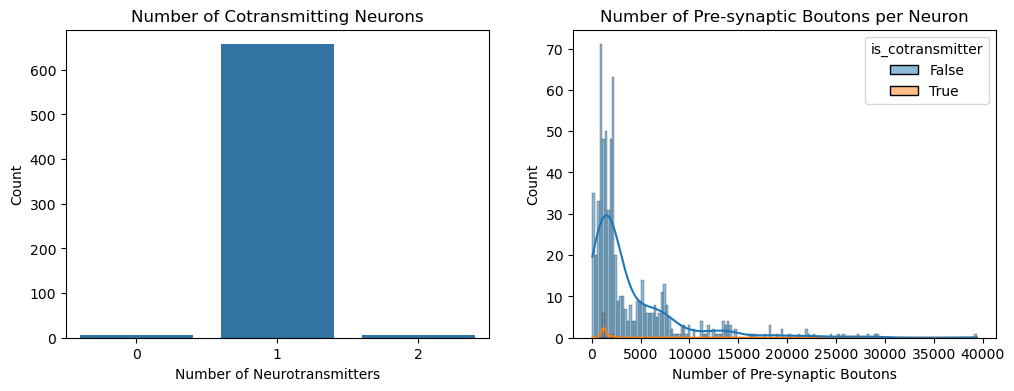

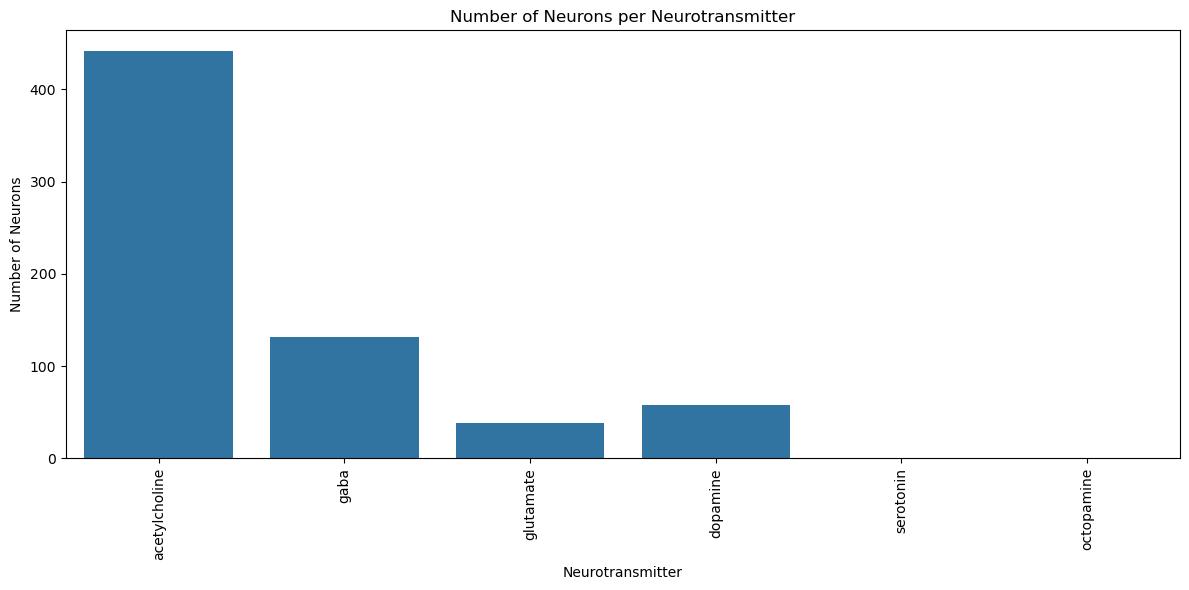

<Figure size 1200x600 with 0 Axes>

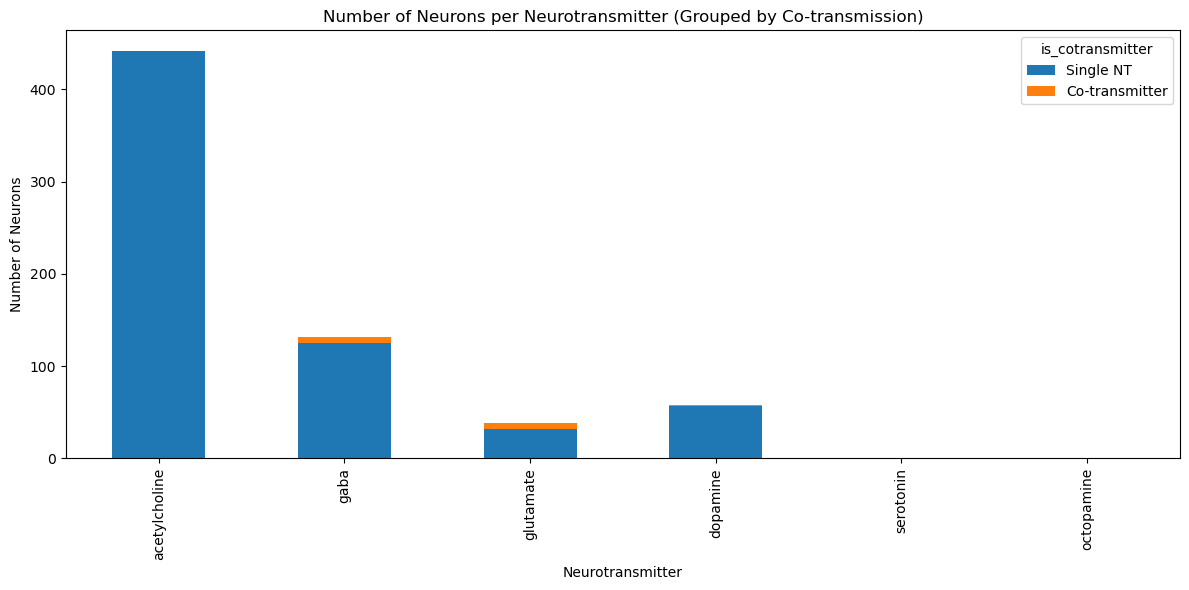

In [83]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

# Plot the number of cotransmitting neurons
sns.countplot(data=simplified_final_df, x='num_nts', ax=ax[0])
ax[0].set_title('Number of Cotransmitting Neurons')
ax[0].set_xlabel('Number of Neurotransmitters')
ax[0].set_ylabel('Count')

# Plot the number of pre-synaptic boutons per neuron
sns.histplot(data=simplified_final_df, x='pre', hue='is_cotransmitter', binwidth=250, kde=True, ax=ax[1])
ax[1].set_title('Number of Pre-synaptic Boutons per Neuron')
ax[1].set_xlabel('Number of Pre-synaptic Boutons')
ax[1].set_ylabel('Count')

# Plot the ratios for each neurotransmitter type
temp = {}
for nt in ['acetylcholine', 'gaba', 'glutamate', 'dopamine', 'serotonin', 'octopamine']:
    temp[nt] = simplified_final_df[nt].value_counts().to_dict()
temp_df = pd.DataFrame(temp).T

plt.figure(figsize=(12,6))
sns.barplot(x=temp_df.index, y=temp_df[True])
plt.xticks(rotation=90)
plt.xlabel('Neurotransmitter')
plt.ylabel('Number of Neurons')
plt.title('Number of Neurons per Neurotransmitter')
plt.tight_layout()
plt.show()

# Plot the ratios where the neuron is cotransmitting
plt.figure(figsize=(12,6))
# Prepare data for stacked bar plot grouped by is_cotransmitter
nt_cols = ['acetylcholine', 'gaba', 'glutamate', 'dopamine', 'serotonin', 'octopamine']
grouped = simplified_final_df.groupby('is_cotransmitter')[nt_cols].sum().T

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Neurotransmitter')
plt.ylabel('Number of Neurons')
plt.title('Number of Neurons per Neurotransmitter (Grouped by Co-transmission)')
plt.xticks(rotation=90)
plt.legend(title='is_cotransmitter', labels=['Single NT', 'Co-transmitter'])
plt.tight_layout()
plt.show()

In [85]:
simplified_final_df['pre'].describe()

count      667.000000
mean      3854.299850
std       4856.519335
min         69.000000
25%       1094.500000
50%       2030.000000
75%       5067.500000
max      39388.000000
Name: pre, dtype: float64

In [84]:
# Save the final DataFrame to a CSV file
simplified_final_df.to_csv('../data/simplified_DataS4.csv', index=False)